<h1 align="center"> What Makes an Airbnb Superhost? </h1>
<h2 align="center"> An Exploratory Analysis of AirBNB Reviews</h2>
<h3 align="center"> By: John Easter, Josh Elam, Weitao Fu, Emily Moreland, Ryan Wainz </h3>
<h3 align="center"> Last Update: 04/10/2020 </h3>

# 1. Introduction

Airbnb, Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. The company is based in San Francisco, California, United States. 

Since its founding in 2008, Airbnb has been one of the top travel sites for people who really want to be immersed in their destination city.

On the Airbnb platform, users have the opportunity to choose their lodging based on price, type of room, number of bedrooms, and most importantly, reviews left by past guests. Hosts also have the opportunity to gain the distinction of a “superhost”, which means that they have provided consistent hospitality to their guests and continue to go above and beyond for those staying in their home.

With our project we plan to make the customer absolutely clear on what specific property they should pursue based on their specific needs so they can have the best experience possible. 

Through this project, we want to answer the following questions:
* What makes someone a good host and gives them a “superhost” title?
     * Superhosts are important for letting the potential renter know that they are renting from an extraordinary and experienced host. 
     
* What types of attributes give listings good/bad reviews?
    * Cleanliness, location relative to popular tourists' sites, amenities (Netflix, Hulu, Cable), price, house rules, and host interactions with guests.
    
* How can we use a predictive model to estimate the quality of a listing?
    * Using a model tailored specifically for you and your needs on your trip.
    
* Which listing should we recommend to customers if they have special needs such as religions, pets, parking, disabilities, and children?
    * While pets and other commodities have made their way to the mainstream amenities for AirBnb's many hosts still do not factor in religion beliefs and disabilities into their rental properties. 

# 2. Data

We found our data set at the following link: https://www.kaggle.com/airbnb/seattle#listings.csv

Key information regarding what makes a "superhost" would be:
* Host response rate
* Host response time
* Experiences offered
* Amenitites
* Price
* Number of reviews
* Review scores rating

This data was directly scraped from the Airbnb website here: https://www.airbnb.com/s/Seattle--WA--United-States/all 

# 3. Data Manipulation

## 3.1 Calendar Dataset

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
cal = pd.read_csv("calendar.csv")
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [64]:
cal.info
pd.crosstab(index=cal['listing_id'],columns="count")
cal = cal.dropna()
pd.crosstab(index=cal['listing_id'],columns="count")

col_0,count
listing_id,
3335,309
4291,365
5682,309
6606,365
7369,53
...,...
10331249,354
10332096,365
10334184,361


* listing_id: Id for each listing.<br>
* date: A date from 01/04/2016 to 01/02/2017.<br>
* available: Availability of a listing in a specific date.<br>
* Price: Rent price of a listing in a specific date.<br>

Cal dataset stores the daily rent price of 3818 listings in a year.

In [65]:
# Enable inline plotting in notebook
%matplotlib inline

### 3.1.1 Variable Transformation

We need to change the datatype of the price column to be a number so we will be able to use it in visualizations

In [66]:
cal
cal['price'] = cal['price'].astype(str) 
cal['price'] = cal['price'].str.replace('$','')
cal['price'] = cal['price'].str.replace(',','')  # remove ',' of '1,234' 
cal['price'] = cal['price'].astype(float) 
cal['date']=pd.to_datetime(cal['date'])
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


We also want to change our date to be a date/time object

In [67]:
cal['month'] = pd.DatetimeIndex(cal['date']).month

### 3.1.2 Average Prices

With these changes, we can easily see what our average price by month is

In [68]:
averagePriceByMonth = cal.groupby('month')['price'].mean()
# average price of all listings in a month
averagePriceByMonth

month
1     122.912176
2     124.293927
3     128.644488
4     135.097005
5     139.538183
6     147.473137
7     152.094150
8     150.656594
9     143.255949
10    137.031939
11    135.688738
12    137.251835
Name: price, dtype: float64

In [69]:
averagePrice= pd.DataFrame(averagePriceByMonth)
averagePrice['month']= pd.Series(range(0,13))
averagePrice

,price,month
month,,
1,122.912176,1
2,124.293927,2
3,128.644488,3
4,135.097005,4
5,139.538183,5
6,147.473137,6
7,152.094150,7
8,150.656594,8
9,143.255949,9


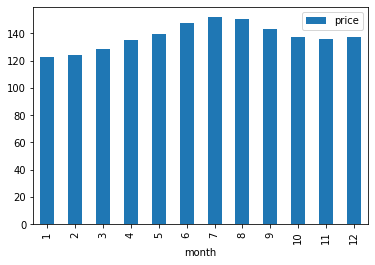

In [70]:
averagePrice.plot.bar(x='month',y='price')

As well as the listing's average price for the entire year.

In [71]:
cal.groupby('listing_id')['price'].mean() # Calculate the average rent price of each listing.

listing_id
3335        120.000000
4291         82.000000
5682         53.944984
6606         92.849315
7369         85.000000
               ...    
10331249     45.000000
10332096     40.000000
10334184    120.000000
10339145    237.904110
10340165     43.000000
Name: price, Length: 3723, dtype: float64

## 3.2 Reviews Dataset

In [72]:
rev = pd.read_csv("reviews.csv")
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [73]:
pd.crosstab(index=rev['listing_id'],columns="count")

col_0,count
listing_id,
4291,35
5682,297
6606,52
7369,40
9419,79
...,...
9995551,1
10012724,2
10020221,1


In [74]:
rev = rev.drop(columns=['id', 'reviewer_id','reviewer_name'])
rev

,listing_id,date,comments
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...
1,7202016,2015-07-20,Kelly has a great room in a very central locat...
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb..."
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...
...,...,...,...
84844,3624990,2015-10-12,The description and pictures of the apartment ...
84845,3624990,2015-10-17,We had an excellent stay. It was clean and com...
84846,3624990,2015-10-20,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,2015-11-02,"Very good apartement, clean and well sized. Si..."


In [75]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  84849 non-null  int64 
 1   date        84849 non-null  object
 2   comments    84831 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [76]:
rev = rev.dropna()

In [77]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  84831 non-null  int64 
 1   date        84831 non-null  object
 2   comments    84831 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


### 3.2.1 String Manipulation

In order to effectively parse through the review comments, we need to change the case of the words so they don't show up multiple times in a count.

In [78]:
rev['newComments']=rev.comments.str.replace('[^a-zA-Z]', ' ').str.lower()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
rev = rev.drop(columns=['comments'])
rev

,listing_id,date,newComments
0,7202016,2015-07-19,cute and cozy place perfect location to every...
1,7202016,2015-07-20,kelly has a great room in a very central locat...
2,7202016,2015-07-26,very spacious apartment and in a great neighb...
3,7202016,2015-08-02,close to seattle center and all it has to offe...
4,7202016,2015-08-10,kelly was a great host and very accommodating ...
...,...,...,...
84844,3624990,2015-10-12,the description and pictures of the apartment ...
84845,3624990,2015-10-17,we had an excellent stay it was clean and com...
84846,3624990,2015-10-20,gran ubicaci n cerca de todo lo atractivo del...
84847,3624990,2015-11-02,very good apartement clean and well sized si...


Get the most mentioned words from customers' review.

In [80]:
from collections import Counter
Counter(" ".join(rev["newComments"]).split()).most_common(100)

[('and', 289516),
 ('the', 286232),
 ('to', 175381),
 ('a', 175367),
 ('was', 163778),
 ('in', 100347),
 ('we', 97600),
 ('is', 89165),
 ('i', 81980),
 ('of', 73385),
 ('very', 72242),
 ('for', 68102),
 ('it', 61622),
 ('great', 60983),
 ('with', 55056),
 ('stay', 52128),
 ('place', 45537),
 ('s', 40637),
 ('seattle', 40322),
 ('our', 39789),
 ('were', 38493),
 ('had', 36056),
 ('you', 35261),
 ('this', 31927),
 ('us', 31884),
 ('my', 30148),
 ('at', 30128),
 ('as', 30121),
 ('clean', 29361),
 ('location', 28761),
 ('there', 26809),
 ('would', 26275),
 ('apartment', 26031),
 ('that', 26030),
 ('on', 25331),
 ('comfortable', 25215),
 ('but', 24536),
 ('nice', 23168),
 ('house', 22943),
 ('so', 22586),
 ('from', 22553),
 ('all', 21109),
 ('host', 21033),
 ('room', 20991),
 ('home', 20754),
 ('again', 20241),
 ('everything', 19825),
 ('she', 19252),
 ('t', 19166),
 ('have', 18361),
 ('neighborhood', 18236),
 ('easy', 18163),
 ('are', 18152),
 ('time', 17913),
 ('an', 17661),
 ('her', 1723

The following words will be useful to determine whether a listing is nice: 'clean','location','apartment','comfortable','house','host','home','everything','neighborhood','easy','downtown','space','quiet','experience',<br>'close','restaurants','area','bed','needed','helpful','walking','beautiful','friendly'

### 3.2.2 Variable Transformation

Again, we need to change our date column to be a date/time object to better analyze the data over a timeframe.

In [81]:
rev['date']=pd.to_datetime(rev['date'])
rev.head()

,listing_id,date,newComments
0,7202016,2015-07-19,cute and cozy place perfect location to every...
1,7202016,2015-07-20,kelly has a great room in a very central locat...
2,7202016,2015-07-26,very spacious apartment and in a great neighb...
3,7202016,2015-08-02,close to seattle center and all it has to offe...
4,7202016,2015-08-10,kelly was a great host and very accommodating ...


In [82]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   84831 non-null  int64         
 1   date         84831 non-null  datetime64[ns]
 2   newComments  84831 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.6+ MB


In [83]:
rev['month'] = pd.DatetimeIndex(rev['date']).month
rev

,listing_id,date,newComments,month
0,7202016,2015-07-19,cute and cozy place perfect location to every...,7
1,7202016,2015-07-20,kelly has a great room in a very central locat...,7
2,7202016,2015-07-26,very spacious apartment and in a great neighb...,7
3,7202016,2015-08-02,close to seattle center and all it has to offe...,8
4,7202016,2015-08-10,kelly was a great host and very accommodating ...,8
...,...,...,...,...
84844,3624990,2015-10-12,the description and pictures of the apartment ...,10
84845,3624990,2015-10-17,we had an excellent stay it was clean and com...,10
84846,3624990,2015-10-20,gran ubicaci n cerca de todo lo atractivo del...,10
84847,3624990,2015-11-02,very good apartement clean and well sized si...,11


In [84]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   84831 non-null  int64         
 1   date         84831 non-null  datetime64[ns]
 2   newComments  84831 non-null  object        
 3   month        84831 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


### 3.2.3 Reviews Per Month

Here, we can easily see how many reviews are posted per month

In [85]:
reviewCount = pd.crosstab(index=rev['month'],columns="count")
reviewCount['month']= pd.Series(range(0,13))
reviewCount

col_0,count,month
month,,
1,2864,1
2,2642,2
3,4157,3
4,4231,4
5,5853,5
6,8542,6
7,10501,7
8,13017,8
9,11675,9


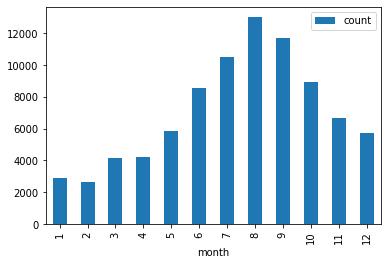

In [86]:
reviewCount.plot.bar(x='month',y='count')

## 3.3 Listings Dataset

In [87]:
lis = pd.read_csv("listings.csv")
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [88]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [89]:
lis = lis.drop(columns=['host_name', 'host_identity_verified','is_location_exact','bathrooms','bedrooms',
                        'beds','guests_included','calendar_updated','has_availability',
                        'require_guest_phone_verification','requires_license','square_feet','license',
                        'weekly_price','monthly_price','security_deposit','cleaning_fee'])
lis

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,10.0,9.0,10.0,WASHINGTON,f,moderate,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,10.0,10.0,WASHINGTON,f,strict,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,10.0,10.0,WASHINGTON,f,strict,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,NaN,NaN,WASHINGTON,f,flexible,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,10.0,10.0,9.0,9.0,WASHINGTON,f,strict,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,4.0,8.0,10.0,8.0,WASHINGTON,f,strict,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,10.0,10.0,10.0,WASHINGTON,f,moderate,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,NaN,NaN,NaN,WASHINGTON,f,moderate,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,NaN,NaN,NaN,WASHINGTON,f,moderate,f,1,NaN


In [90]:
lis = lis.dropna()
lis = lis.reset_index(drop=True)
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1147 non-null   int64  
 1   listing_url                     1147 non-null   object 
 2   scrape_id                       1147 non-null   int64  
 3   last_scraped                    1147 non-null   object 
 4   name                            1147 non-null   object 
 5   summary                         1147 non-null   object 
 6   space                           1147 non-null   object 
 7   description                     1147 non-null   object 
 8   experiences_offered             1147 non-null   object 
 9   neighborhood_overview           1147 non-null   object 
 10  notes                           1147 non-null   object 
 11  transit                         1147 non-null   object 
 12  thumbnail_url                   11

### 3.3.1 Basic Host Information

Host response time is a big factor in the happiness of an Airbnb guest

In [91]:
responseTime=pd.crosstab(index=lis['host_response_time'],columns="count")

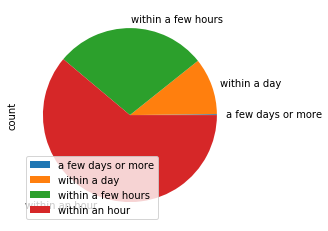

In [92]:
responseTime.plot.pie(y='count')

Hosts often list more than one property as well

In [93]:
hostId = pd.crosstab(index=lis['host_id'],columns="listingCount") 
hostId

col_0,listingCount
host_id,
4193,1
6207,1
11775,1
30559,2
30604,1
...,...
48604323,1
49123244,1
49310311,1


In [94]:
 pd.crosstab(index=hostId['listingCount'],columns="peopleCount")  # distribution of the number of listings a host has

col_0,peopleCount
listingCount,
1,659
2,115
3,20
4,10
5,3
6,2
7,1
9,3
13,1


We can see how many hosts are considered "superhosts".

In [95]:
superhostCount = lis[['host_id','host_is_superhost']].copy()
superhostCount

,host_id,host_is_superhost
0,5177328,t
1,2497928,t
2,4016632,t
3,5177328,t
4,239585,t
...,...,...
1142,4071088,f
1143,7964921,f
1144,1379138,f
1145,3443346,t


In [96]:
superhostCount = superhostCount.drop_duplicates(subset='host_id', keep="first")

In [97]:
 pd.crosstab(index=superhostCount['host_is_superhost'],columns="Count") 

col_0,Count
host_is_superhost,
f,544
t,273


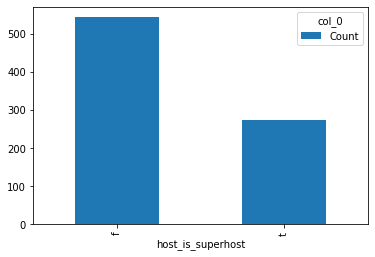

In [98]:
 pd.crosstab(index=superhostCount['host_is_superhost'],columns="Count") .plot.bar()

Hosts have the abilities to list what amenities their homes might have, such as kitchen access, pets, and toiletries.

In [99]:
lis['newAmenities']=lis.amenities.str.replace('[^a-zA-Z]', ' ').str.lower()

### 3.3.2 Amenities

We can see here the most common amenities listed by Airbnb hosts

In [100]:
Counter(" ".join(lis["newAmenities"]).split()).most_common(100)

[('internet', 1994),
 ('detector', 1872),
 ('wireless', 1276),
 ('tv', 1197),
 ('dryer', 1167),
 ('heating', 1114),
 ('essentials', 1059),
 ('smoke', 1043),
 ('on', 1020),
 ('kitchen', 1006),
 ('shampoo', 910),
 ('washer', 884),
 ('friendly', 860),
 ('carbon', 829),
 ('monoxide', 829),
 ('fire', 775),
 ('extinguisher', 775),
 ('free', 671),
 ('parking', 671),
 ('premises', 671),
 ('first', 627),
 ('aid', 627),
 ('kit', 627),
 ('family', 617),
 ('kid', 617),
 ('pets', 446),
 ('cable', 446),
 ('in', 409),
 ('s', 346),
 ('live', 314),
 ('this', 314),
 ('property', 314),
 ('hangers', 287),
 ('hair', 280),
 ('safety', 279),
 ('card', 279),
 ('iron', 259),
 ('laptop', 243),
 ('workspace', 243),
 ('indoor', 239),
 ('fireplace', 239),
 ('hour', 213),
 ('check', 213),
 ('air', 211),
 ('conditioning', 211),
 ('elevator', 196),
 ('building', 196),
 ('dog', 175),
 ('allowed', 159),
 ('cat', 150),
 ('buzzer', 148),
 ('intercom', 148),
 ('breakfast', 119),
 ('gym', 114),
 ('hot', 90),
 ('tub', 90),


In [101]:
lis['newAmenities']

0        tv internet  wireless internet  kitchen  free...
1         wireless internet   free parking on premises...
2         wireless internet   pets live on this proper...
3        tv internet  wireless internet  kitchen  free...
4        tv  cable tv  internet  wireless internet  ki...
                              ...                        
1142     tv internet  wireless internet   air conditio...
1143     tv  cable tv  internet  wireless internet   a...
1144     tv  cable tv  internet  wireless internet  ki...
1145     internet  wireless internet  kitchen  free pa...
1146     tv  cable tv  internet  wireless internet  ki...
Name: newAmenities, Length: 1147, dtype: object

In [102]:
lis.head(3).transpose()

,0,1,2
id,953595,1909058,856550
listing_url,https://www.airbnb.com/rooms/953595,https://www.airbnb.com/rooms/1909058,https://www.airbnb.com/rooms/856550
scrape_id,20160104002432,20160104002432,20160104002432
last_scraped,2016-01-04,2016-01-04,2016-01-04
name,Bright & Airy Queen Anne Apartment,Queen Anne Private Bed and Bath,Tiny Garden cabin on Queen Anne
...,...,...,...
cancellation_policy,strict,moderate,strict
require_guest_profile_picture,t,f,t
calculated_host_listings_count,6,1,5
reviews_per_month,1.48,2.46,4.73


Different amenities are important to different guests. The following function will allow us to search through all the listings to find specific amentities that guests want.

In [103]:
def contains_word(s, w):
    return w in s
amenities = lis['newAmenities'].tolist()
find_word = pd.Series()
for s in amenities:
    find_word = find_word.append(pd.Series(contains_word(s, 'pet')))
    find_word

pd.crosstab(index=find_word,columns="Count") 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


col_0,Count
row_0,
False,762
True,385


## 3.4 Summary Statistics and Correlation Analysis

In [104]:
# get the summary statistics for all three data sets
lis.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1147.0,4.761794e+06,2.581058e+06,9.419000e+03,2.725588e+06,4.639040e+06,6.959974e+06,1.001272e+07
scrape_id,1147.0,2.016010e+13,0.000000e+00,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13
host_id,1147.0,1.275422e+07,1.197325e+07,4.193000e+03,3.074414e+06,8.758451e+06,2.006901e+07,5.058642e+07
host_listings_count,1147.0,9.039233e+00,2.829946e+01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.690000e+02
host_total_listings_count,1147.0,9.039233e+00,2.829946e+01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.690000e+02
latitude,1147.0,4.762743e+01,4.471330e-02,4.750839e+01,4.760719e+01,4.762290e+01,4.766258e+01,4.773336e+01
longitude,1147.0,-1.223309e+02,3.217009e-02,-1.224122e+02,-1.223527e+02,-1.223273e+02,-1.223084e+02,-1.222582e+02
accommodates,1147.0,3.333915e+00,1.927823e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
minimum_nights,1147.0,1.895379e+00,1.179909e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01
maximum_nights,1147.0,6.935031e+02,5.229132e+02,1.000000e+00,3.000000e+01,1.125000e+03,1.125000e+03,1.125000e+03


We can see here that we are missing our superhost and price variables. This is because they are string variables, so we need to change them to integers.

In [105]:
lis['superhost'] = lis['host_is_superhost'].replace(to_replace = ['t','f'], value = [1,0])
price_num = pd.Series()
for p in lis['price']:
    price_num = price_num.append(pd.Series(float(p[1:])), ignore_index = True)
lis = lis.assign(price_num=price_num.values)
lis

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month,newAmenities,superhost,price_num
0,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,WASHINGTON,f,strict,t,6,1.48,tv internet wireless internet kitchen free...,1,150.0
1,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,WASHINGTON,f,moderate,f,1,2.46,wireless internet free parking on premises...,1,80.0
2,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,WASHINGTON,f,strict,t,5,4.73,wireless internet pets live on this proper...,1,60.0
3,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,WASHINGTON,f,strict,t,6,1.55,tv internet wireless internet kitchen free...,1,150.0
4,175576,https://www.airbnb.com/rooms/175576,20160104002432,2016-01-04,Private Apartment - Queen Anne Hill,Queen Anne Hill is a charming neighborhood wit...,Be close to everything! Queen Anne Hill is a ...,Queen Anne Hill is a charming neighborhood wit...,none,Queen Anne Hill is a wonderful and historic ar...,...,10.0,WASHINGTON,f,moderate,t,1,3.33,tv cable tv internet wireless internet ki...,1,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,8054902,https://www.airbnb.com/rooms/8054902,20160104002432,2016-01-04,2 BR/1 BA Fremont Apt w/ parking,"This 2 bedroom, 1 bath garden-level apartment ...","The Space This 2 bedroom, 1 bath garden-level ...","This 2 bedroom, 1 bath garden-level apartment ...",none,One of the most fun neighborhoods in Seattle. ...,...,10.0,WASHINGTON,f,strict,f,1,3.95,tv internet wireless internet air conditio...,0,100.0
1143,1844791,https://www.airbnb.com/rooms/1844791,20160104002432,2016-01-04,Beautiful Craftsman - Fremont 3 Bed,Our charming home in fabulous Upper Fremont is...,This is a classically beautiful Craftsman home...,Our charming home in fabulous Upper Fremont is...,none,Fremont is wonderful; you will love it here. T...,...,9.0,WASHINGTON,f,strict,f,2,1.15,tv cable tv internet wireless internet a...,0,175.0
1144,262764,https://www.airbnb.com/rooms/262764,20160104002432,2016-01-04,Fremont Farmhouse,Our 2BR/1 bath home in Fremont's most fun neig...,"1200 ft2 2BR, 1 Bath farmhouse with a large, t...",Our 2BR/1 bath home in Fremont's most fun neig...,none,We love that Fremont is so centrally located t...,...,8.0,WASHINGTON,f,strict,f,1,1.56,tv cable tv internet wireless internet ki...,0,154.0
1145,3383329,https://www.airbnb.com/rooms/3383329,20160104002432,2016-01-04,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",none,It's taken me a while to figure out why Fremon...,...,10.0,WASHINGTON,t,moderate,t,3,4.01,inter

In [106]:
lis.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1147.0,4.761794e+06,2.581058e+06,9.419000e+03,2.725588e+06,4.639040e+06,6.959974e+06,1.001272e+07
scrape_id,1147.0,2.016010e+13,0.000000e+00,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13
host_id,1147.0,1.275422e+07,1.197325e+07,4.193000e+03,3.074414e+06,8.758451e+06,2.006901e+07,5.058642e+07
host_listings_count,1147.0,9.039233e+00,2.829946e+01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.690000e+02
host_total_listings_count,1147.0,9.039233e+00,2.829946e+01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.690000e+02
latitude,1147.0,4.762743e+01,4.471330e-02,4.750839e+01,4.760719e+01,4.762290e+01,4.766258e+01,4.773336e+01
longitude,1147.0,-1.223309e+02,3.217009e-02,-1.224122e+02,-1.223527e+02,-1.223273e+02,-1.223084e+02,-1.222582e+02
accommodates,1147.0,3.333915e+00,1.927823e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
minimum_nights,1147.0,1.895379e+00,1.179909e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01
maximum_nights,1147.0,6.935031e+02,5.229132e+02,1.000000e+00,3.000000e+01,1.125000e+03,1.125000e+03,1.125000e+03


We also do not want our id numbers in our summary statistics, since they are strictly categorical variables, so we need to convert them to strings.

In [107]:
lis[['id','scrape_id','host_id']] = lis[['id','scrape_id','host_id']].astype(str)

# correlation matrix
lis.corr(method = 'pearson')

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,superhost,price_num
host_listings_count,1.000000,1.000000,-0.046642,-0.019983,0.215829,0.048626,0.172879,0.158956,0.160412,0.156438,...,-0.179227,-0.106807,-0.162089,-0.122417,0.014445,-0.158359,0.214736,-0.225494,-0.165374,0.068214
host_total_listings_count,1.000000,1.000000,-0.046642,-0.019983,0.215829,0.048626,0.172879,0.158956,0.160412,0.156438,...,-0.179227,-0.106807,-0.162089,-0.122417,0.014445,-0.158359,0.214736,-0.225494,-0.165374,0.068214
latitude,-0.046642,-0.046642,1.000000,-0.194552,-0.016146,0.032470,-0.017209,0.020503,-0.004312,-0.008126,...,-0.062770,-0.107706,-0.024651,-0.041586,0.121586,-0.078336,0.056691,-0.068236,-0.047519,-0.011605
longitude,-0.019983,-0.019983,-0.194552,1.000000,-0.017730,-0.006208,0.053086,-0.025585,-0.009890,0.005883,...,-0.068314,-0.055542,-0.110106,-0.076307,-0.195586,-0.063708,0.108612,-0.041128,-0.049487,-0.077707
accommodates,0.215829,0.215829,-0.016146,-0.017730,1.000000,0.100918,0.073306,-0.030132,-0.042295,-0.051701,...,-0.070098,-0.006162,-0.045939,-0.058041,-0.061038,-0.093709,0.015534,-0.170647,-0.072079,0.652204
minimum_nights,0.048626,0.048626,0.032470,-0.006208,0.100918,1.000000,-0.069380,-0.039074,-0.051001,-0.053368,...,0.014913,-0.018638,0.016264,0.021159,0.038320,0.008062,0.114791,-0.244029,-0.000703,0.129961
maximum_nights,0.172879,0.172879,-0.017209,0.053086,0.073306,-0.069380,1.000000,0.051133,0.055023,0.056820,...,-0.092082,-0.074990,-0.098646,-0.087662,-0.080047,-0.092141,0.195528,-0.104331,-0.152256,0.006179
availability_30,0.158956,0.158956,0.020503,-0.025585,-0.030132,-0.039074,0.051133,1.000000,0.917401,0.846259,...,-0.117900,-0.049742,-0.080716,-0.068054,-0.060705,-0.149986,0.168363,-0.058952,-0.104297,-0.018358
availability_60,0.160412,0.160412,-0.004312,-0.009890,-0.042295,-0.051001,0.055023,0.917401,1.000000,0.966383,...,-0.095754,-0.029717,-0.066566,-0.056113,-0.066328,-0.125120,0.149091,0.003325,-0.091748,-0.040446
availability_90,0.156438,0.156438,-0.008126,0.005883,-0.051701,-0.053368,0.056820,0.846259,0.966383,1.000000,...,-0.082872,-0.025427,-0.062119,-0.057045,-0.061230,-0.116621,0.136530,0.019019,-0.088901,-0.053166


We want to focus on the pair-wise correlation with 'superhost'

In [108]:
lis.corr(method = 'pearson')['superhost']

host_listings_count              -0.165374
host_total_listings_count        -0.165374
latitude                         -0.047519
longitude                        -0.049487
accommodates                     -0.072079
minimum_nights                   -0.000703
maximum_nights                   -0.152256
availability_30                  -0.104297
availability_60                  -0.091748
availability_90                  -0.088901
availability_365                 -0.075313
number_of_reviews                 0.158817
review_scores_rating              0.342811
review_scores_accuracy            0.290195
review_scores_cleanliness         0.305016
review_scores_checkin             0.244009
review_scores_communication       0.225276
review_scores_location            0.125209
review_scores_value               0.323815
calculated_host_listings_count   -0.178812
reviews_per_month                 0.200280
superhost                         1.000000
price_num                        -0.006389
Name: super

From our correlation matrix, we can see that there are a few columns that We can see have a postitive relation to why someone might be considered a superhost: number_of_reviews, review_scores_accuracy, and review_scores_cleanliness. We can also see that the other values associated with the review columns (checkin, communication, location, and value) are also highly positive compared to the other values. 

From this, we can infer that a superhost rating is mostly based on the ratings of their listings.

We can now create a refined data set excluding unnecessary predictors

In [109]:
lis_refined = lis[['host_listings_count','accommodates','minimum_nights','maximum_nights',
                  'availability_30','availability_60','availability_90','availability_365',
                  'number_of_reviews','review_scores_rating','review_scores_accuracy',
                  'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                  'review_scores_location','review_scores_value','reviews_per_month',
                   'superhost','price_num']]

lis_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_listings_count          1147 non-null   float64
 1   accommodates                 1147 non-null   int64  
 2   minimum_nights               1147 non-null   int64  
 3   maximum_nights               1147 non-null   int64  
 4   availability_30              1147 non-null   int64  
 5   availability_60              1147 non-null   int64  
 6   availability_90              1147 non-null   int64  
 7   availability_365             1147 non-null   int64  
 8   number_of_reviews            1147 non-null   int64  
 9   review_scores_rating         1147 non-null   float64
 10  review_scores_accuracy       1147 non-null   float64
 11  review_scores_cleanliness    1147 non-null   float64
 12  review_scores_checkin        1147 non-null   float64
 13  review_scores_comm

## 3.5 Explore the Refined Dataset

First, let's explore histograms of the numerical data, excluding the superhost binary column

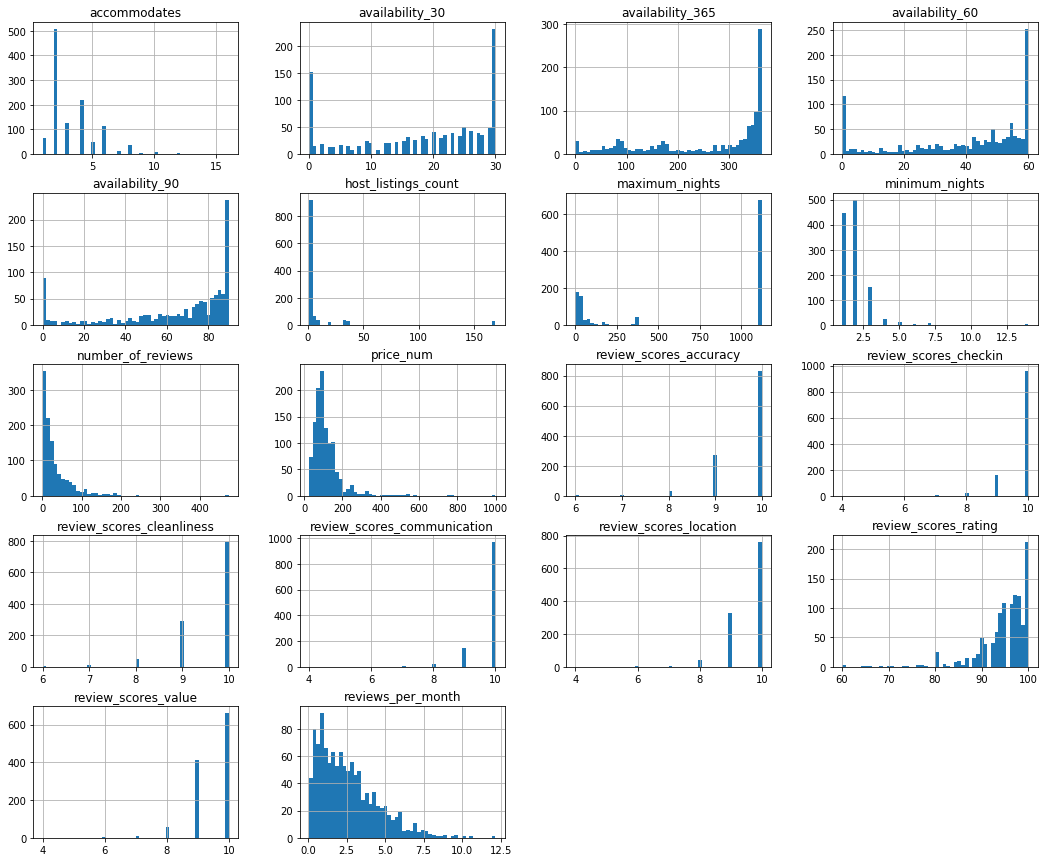

In [110]:
column_index = ['host_listings_count','accommodates','minimum_nights','maximum_nights',
               'availability_30','availability_60','availability_90','availability_365',
               'number_of_reviews','review_scores_rating','review_scores_accuracy',
               'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
               'review_scores_location','review_scores_value','reviews_per_month',
               'price_num']

histogram1 = lis_refined[column_index].hist(bins=50, figsize=(18,15))

We can see the variables are slightley skewed, so we can log transform the variables

In [111]:
# Get a copy of the refined dataset
ln_lis_refined = lis_refined.copy()

# Log transform columns excluding num_found_hepful
for column in ln_lis_refined[column_index]:
    ln_lis_refined[column] = np.log(ln_lis_refined[column] + 1)

# Summary statistics of the log tranformed dataset
ln_lis_refined[column_index].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
host_listings_count,1147.0,1.332414,1.004511,0.693147,0.693147,1.098612,1.386294,5.135798
accommodates,1147.0,1.384251,0.392628,0.693147,1.098612,1.386294,1.609438,2.833213
minimum_nights,1147.0,1.009267,0.307255,0.693147,0.693147,1.098612,1.098612,2.708050
maximum_nights,1147.0,5.578397,1.902030,0.693147,3.433987,7.026427,7.026427,7.026427
availability_30,1147.0,2.569064,1.153317,0.000000,2.350240,3.091042,3.367296,3.433987
availability_60,1147.0,3.353359,1.233271,0.000000,3.367296,3.891820,4.060443,4.110874
availability_90,1147.0,3.834789,1.230300,0.000000,3.951244,4.343805,4.477337,4.510860
availability_365,1147.0,5.291088,1.022501,0.000000,5.056246,5.780744,5.883322,5.902633
number_of_reviews,1147.0,2.981343,1.128680,0.693147,2.138333,2.995732,3.806662,6.163315
review_scores_rating,1147.0,4.560408,0.063234,4.110874,4.543295,4.574711,4.595120,4.615121


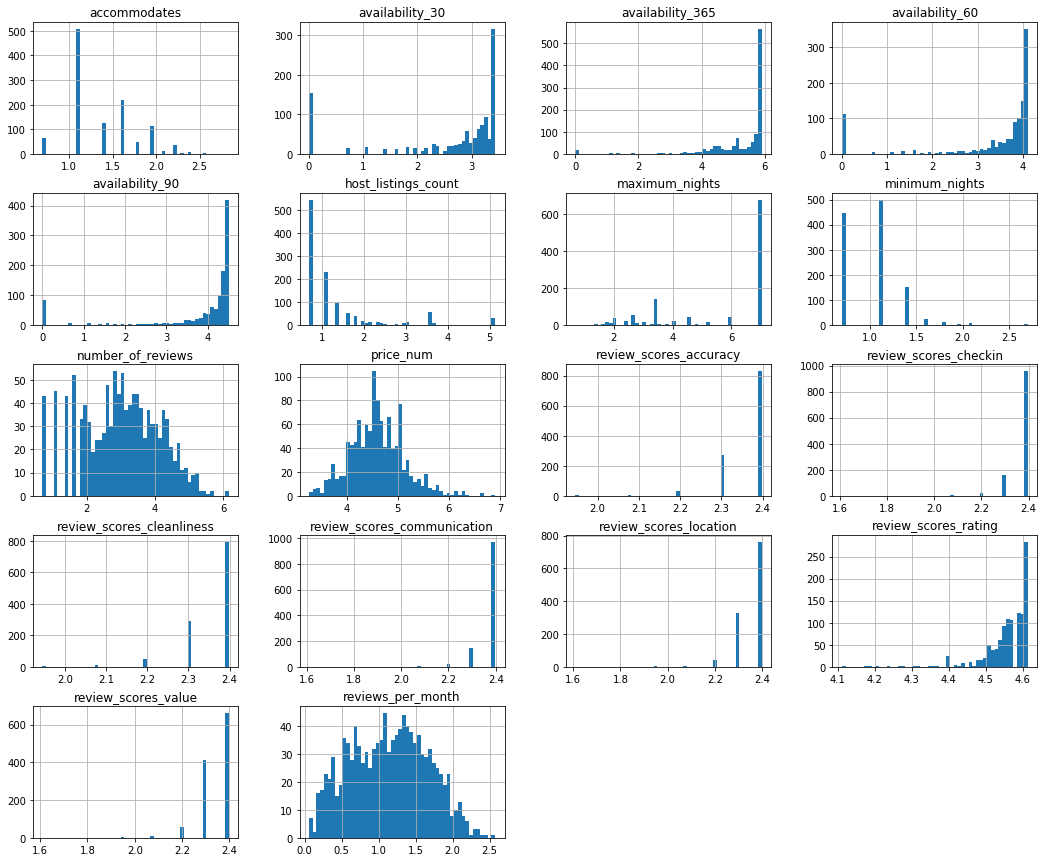

In [112]:
# Show histograms of log transformed variables
historam2 = ln_lis_refined[column_index].hist(bins=50, figsize=(18,15))

We can see that this transformation did help the distribution of some of the variables.

## 3.6 Visualizations

First, let's see what the ratings distribution is among hosts versus superhosts

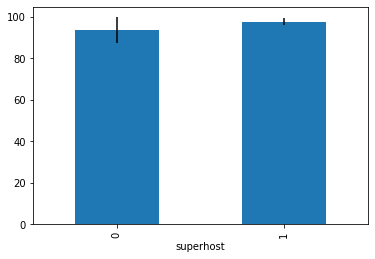

In [113]:
mean_review_by_host_id = lis[['superhost','review_scores_rating']].groupby('superhost').mean()

# standard error
std1 = lis[['superhost', 'review_scores_rating']].groupby('superhost').std()

mean_review_by_host_id.plot(kind='bar', yerr=std1, legend=False)

From this bar chart, we can see that superhosts have, on average, a higher rating score than just normal hosts on Airbnb. We can also see that there is more variation on an average score for a typcial host.

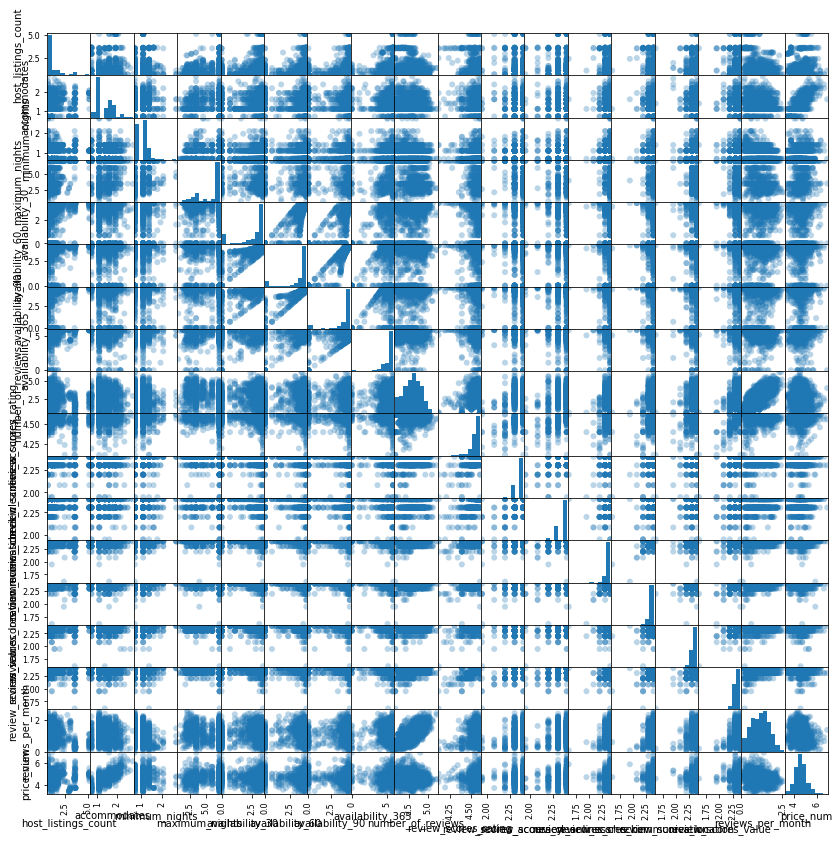

In [114]:
scatterplot = pd.plotting.scatter_matrix(ln_lis_refined[column_index],
                           alpha=0.3,
                           figsize=(14, 14),
                           diagonal='hist',
                           marker='o',
                           grid=True)

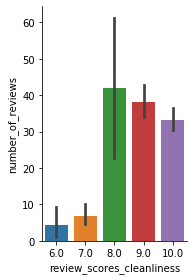

In [115]:
# Catplot
g = sns.catplot(x="review_scores_cleanliness", y="number_of_reviews",
                   data=lis, kind="bar",
                   height=4, aspect=.7);

The data reveals that on average, most people only review the listings if the cleanliness is higher than a seven. The review cleanliness average is around eight and a half.

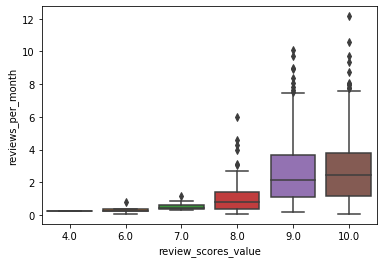

In [116]:
# Boxplot
Average_Review = sns.boxplot(x="review_scores_value", y="reviews_per_month", data=lis);

From the results of the boxplot, results show that most of the reviews during the month are predominately high scores above eight. The most outliers range from a score value of eight through ten.

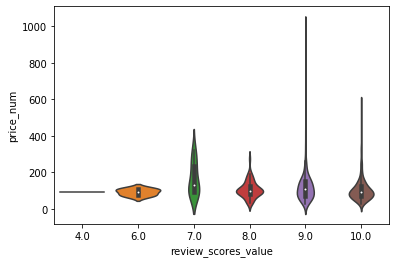

In [117]:
# Violinplot
Review_Accuracy = sns.violinplot(x = lis["review_scores_value"], y = lis["price_num"])

The violinplot reveals that price has little effect on the score value. The average price is almost identical no matter the review score.

# 5. Regression Analysis

First, we need to create X and y datasets to represent our predictors and dependent variables

In [118]:
from patsy import dmatrices

# create the design matrices
y, X = dmatrices('superhost ~ host_listings_count + accommodates +' + 
                 'minimum_nights + maximum_nights + availability_30 +' + 
                 'availability_60 + availability_90 + availability_365 +' +
                 'number_of_reviews + review_scores_rating + review_scores_accuracy +' +
                 'review_scores_cleanliness + review_scores_checkin +' +
                 'review_scores_communication + review_scores_location +' +
                 'review_scores_value + reviews_per_month + price_num',
                 data = lis_refined,
                 return_type = 'dataframe')

In [119]:
y.shape

(1147, 1)

In [120]:
X.shape

(1147, 19)

In [121]:
import statsmodels.api as sm

In [122]:
# Describe the linear model
mod = sm.OLS(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              superhost   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     14.79
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           6.59e-41
Time:                        14:08:33   Log-Likelihood:                -624.57
No. Observations:                1147   AIC:                             1287.
Df Residuals:                    1128   BIC:                             1383.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.5517      0.317     -8.044      0.000      -3.174      -1.929
host_listings_count            -0.0007      0.000     -1.489      0.137      -0.002       0.000
accommodates                   -0.0135      0.009     -1.514      0.130      -0.031       0.004
minimum_nights                  0.0072      0.011      0.653      0.514      -0.014       0.029
maximum_nights              -6.208e-05   2.57e-05     -2.419      0.016      -0.000   -1.17e-05
availability_30                -0.0011      0.003     -0.343      0.731      -0.007       0.005
availability_60                 0.0012      0.004      0.329      0.742      -0.006       0.008
availability_90                -0.0014      0.002     -0.724      0.469      -0.005       0.002
availability_365             9.068e-05      0.000      0.711      0.477      -0.000       0.000
number_of_reviews               0.0009      0.000      2.353      0.019       0.000       0.002
review_scores_rating            0.0098      0.004      2.613      0.009       0.002       0.017
review_scores_accuracy          0.0300      0.029      1.031      0.303      -0.027       0.087
review_scores_cleanliness       0.0896      0.026      3.423      0.001       0.038       0.141
review_scores_checkin           0.0437      0.035      1.248      0.212      -0.025       0.112
review_scores_communication    -0.0056      0.036     -0.156      0.876      -0.076       0.065
review_scores_location         -0.0510      0.023     -2.209      0.027      -0.096      -0.006
review_scores_value             0.0945      0.027      3.563      0.000       0.042       0.147
reviews_per_month               0.0194      0.009      2.158      0.031       0.002       0.037
price_num                       0.0003      0.000      1.511      0.131   -9.85e-05       0.001
==============================================================================
Omnibus:                    20304.848   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.822
Skew:                           0.457   Prob(JB):                     1.75e-28
Kurtosis:                       1.644   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# create the design matrices
y, X = dmatrices('superhost ~ host_listings_count + accommodates +' + 
                 'minimum_nights + maximum_nights + availability_30 +' + 
                 'availability_60 + availability_90 + availability_365 +' +
                 'number_of_reviews + review_scores_rating + review_scores_accuracy +' +
                 'review_scores_cleanliness + review_scores_checkin +' +
                 'review_scores_communication + review_scores_location +' +
                 'review_scores_value + reviews_per_month + price_num',
                 data = ln_lis_refined,
                 return_type = 'dataframe')

# Describe the linear model
mod = sm.OLS(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              superhost   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     18.05
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.75e-50
Time:                        14:08:34   Log-Likelihood:                -600.87
No. Observations:                1147   AIC:                             1240.
Df Residuals:                    1128   BIC:                             1336.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.7670      1.035     -7.503      0.000      -9.798      -5.736
host_listings_count            -0.0019      0.014     -0.134      0.894      -0.030       0.026
accommodates                   -0.1574      0.045     -3.502      0.000      -0.246      -0.069
minimum_nights                  0.0363      0.043      0.845      0.398      -0.048       0.120
maximum_nights                 -0.0063      0.007     -0.915      0.360      -0.020       0.007
availability_30                -0.0383      0.025     -1.516      0.130      -0.088       0.011
availability_60                 0.0065      0.043      0.153      0.879      -0.077       0.090
availability_90                -0.0034      0.033     -0.104      0.917      -0.067       0.061
availability_365               -0.0109      0.015     -0.749      0.454      -0.039       0.018
number_of_reviews               0.1024      0.016      6.573      0.000       0.072       0.133
review_scores_rating            0.7046      0.323      2.182      0.029       0.071       1.338
review_scores_accuracy          0.2787      0.282      0.989      0.323      -0.274       0.832
review_scores_cleanliness       0.9608      0.254      3.777      0.000       0.462       1.460
review_scores_checkin           0.4298      0.336      1.280      0.201      -0.229       1.089
review_scores_communication    -0.2171      0.347     -0.626      0.532      -0.898       0.464
review_scores_location         -0.5774      0.223     -2.591      0.010      -1.015      -0.140
review_scores_value             0.9678      0.261      3.705      0.000       0.455       1.480
reviews_per_month               0.0004      0.037      0.012      0.991      -0.072       0.073
price_num                       0.1268      0.035      3.639      0.000       0.058       0.195
==============================================================================
Omnibus:                     1585.067   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.933
Skew:                           0.451   Prob(JB):                     1.10e-25
Kurtosis:                       1.738   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above regression, we found that:

- Number of reviews has a positive effect on being a Superhost. Increasing 1 review  would increase status by .10 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)


- The review scores of cleanliness has a positive effect on being a Superhost. Increasing 1 review  would increase status by .96 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)

- The review scores value has a positive effect on being a Superhost. Increasing 1 review  would increase status by .96 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)

- Accommodates has a negative effect on being a Superhost. This effect of number of accommodates on superhost is statistically significant (P<0.001)


- The coefficient of review scores value is estimated as 0.9678. The review score is is statistically significant which would indicate that the review score on average leads to a higher superhost rating even compared to the scoring of cleanliness. 


